# Bifurcación C-D y atractor C según prior inicial  y paranoia: Avoiding Trust

* Si todos los agentes empiezan con un prior sobre los otros agentes tal que $P_D<D^*$ entonces el estado de cooperación total es estable.
* Si todos los agentes empiezan con un prior tal que $P_D>D^*$ los agentes a veces cooperan y a veces no. Estado corrupto.
    - En algún momento si todos los agentes cooperan estocásiticamente pueden caer en el estado de cooperación total del cual no salen.

El efecto de cognitive disonance disminuye la probabilidad de que el sistema en el estado corrupto caiga en el estado de cooperación.

# Avoiding Trust with Memory

In [1]:
%matplotlib notebook

from __future__ import division
from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from IPython.display import display 
from glob import glob
import pickle
sns.set_palette('colorblind')
sns.set_style("ticks")#, {"font.family": "Times New Roman"}
sns.set_context("paper")
linewidthin = 3.68153

def pivot_table_heatmap(data=None, index=None, columns=None, values=None, aggfunc=np.mean, *args, **kwargs):
    df = pd.pivot_table(data, index=index, columns=columns, values=values, aggfunc=aggfunc)
    xl = ['{:.2}'.format(x) for x in df.columns]
    out = sns.heatmap(df, xticklabels=xl, *args, **kwargs)
    return out

In [14]:
df = pd.read_pickle('data/bifurcation6.pkl')
df['Time'] += 1
df = df.rename(columns={'Defections': 'Rate of Defections', 'Proyection': 'Projection'})
ind = df['Paranoia']<0.4
view = df.loc[ind, 'Parameters']
df.loc[ind, 'Parameters'] = view.str[:5] + view.str[8] + ', ' + view.str[5] + view.str[9:]

ind = df['Paranoia']>0.4
view = df.loc[ind, 'Parameters']
df.loc[ind, 'Parameters'] = view.str[:5] + view.str[9] + ', ' + view.str[5:7] + view.str[10:]

df.head()

AlD  Cooperations  Rate of Defections  Fraction of Corrupted Edges  \
0    0      0.483907            0.516093                     1.000000   
1    0      0.487079            0.512921                     0.988015   
2    0      0.492991            0.507009                     0.964621   
3    0      0.497827            0.502173                     0.945831   
4    0      0.499621            0.500379                     0.933112   

                 Parameters  Paranoia   Prior  Projection  Time  seed  
0  Beta(5, 7), Paranoia 0.0       0.0  (7, 5)        0.25     1    97  
1  Beta(5, 7), Paranoia 0.0       0.0  (7, 5)        0.25     2    97  
2  Beta(5, 7), Paranoia 0.0       0.0  (7, 5)        0.25     3    97  
3  Beta(5, 7), Paranoia 0.0       0.0  (7, 5)        0.25     4    97  
4  Beta(5, 7), Paranoia 0.0       0.0  (7, 5)        0.25     5    97

<IPython.core.display.Javascript object>


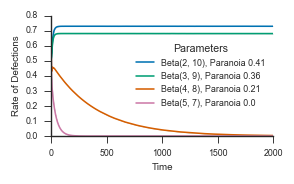

<IPython.core.display.Javascript object>


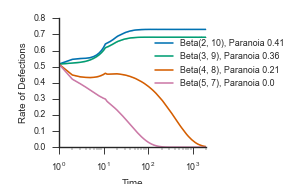

In [17]:
fig = plt.figure(figsize=(linewidthin, linewidthin/1.6))
sns.tsplot(data=df[df['Projection']==0].sort_values('Paranoia', ascending=False), time='Time',
           value='Rate of Defections', unit='seed', condition='Parameters', n_boot=10)
plt.xlim([0, 2000])
sns.despine()
fig.tight_layout()
plt.savefig('figures/02-avoiding.pdf')
plt.show()

fig = plt.figure(figsize=(linewidthin, linewidthin/1.6))
ax = fig.add_axes([0.2, 0.2, 0.5, 0.7], xscale='log')
 
sns.tsplot(data=df[df['Projection']==0].sort_values('Paranoia', ascending=False), time='Time',
           value='Rate of Defections', unit='seed', condition='Parameters', n_boot=10, ax=ax)
ax.legend(loc=6, bbox_to_anchor=(0.6, 0.65))
plt.xlim([0, 2000])
sns.despine()
plt.savefig('figures/02-avoiding_log.pdf')
plt.show()

<IPython.core.display.Javascript object>


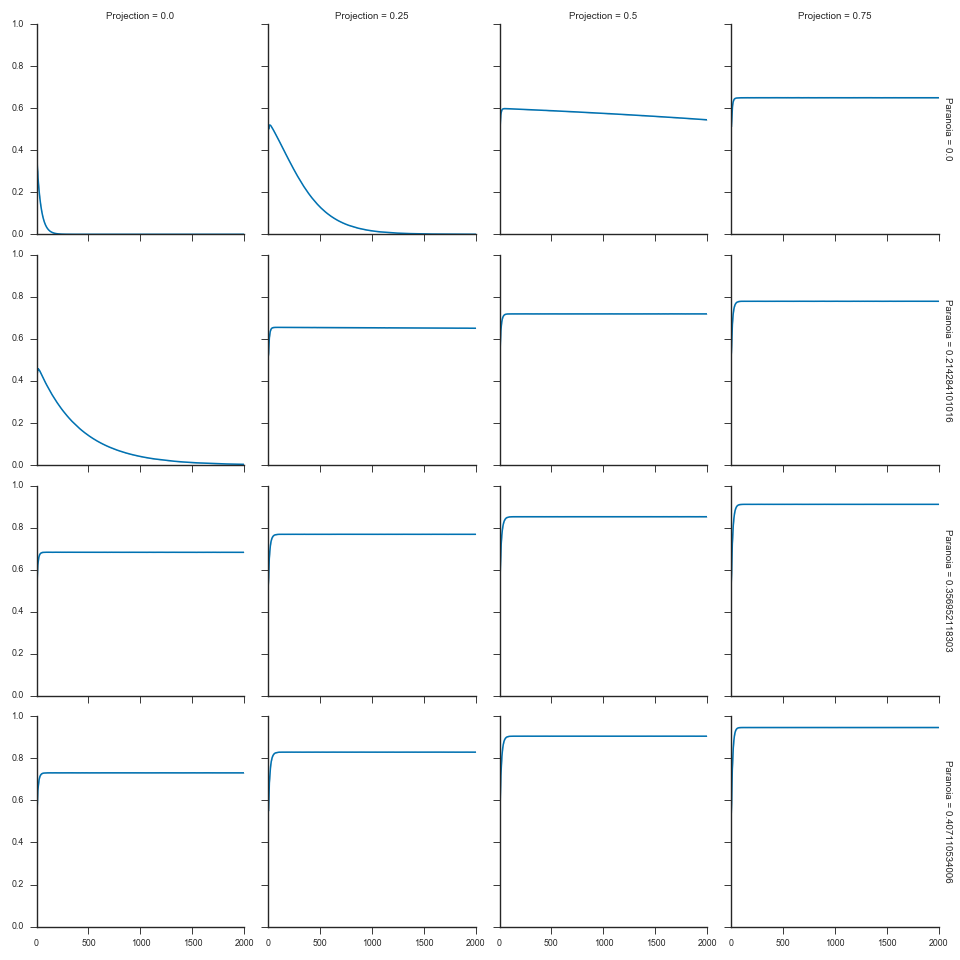

In [19]:
#g = sns.FacetGrid(df[df['Proyection']<0.08], col='Proyection', row='Paranoia', margin_titles=True,
#                  col_order=sorted(df['Proyection'].unique()), row_order=sorted(df['Paranoia'].unique()))
g = sns.FacetGrid(df, col='Projection', row='Paranoia', margin_titles=True,
                  col_order=sorted(df['Projection'].unique()), row_order=sorted(df['Paranoia'].unique()))

g.map_dataframe(sns.tsplot, time='Time', value='Rate of Defections',
           unit='seed', condition='Parameters', n_boot=2)

<IPython.core.display.Javascript object>


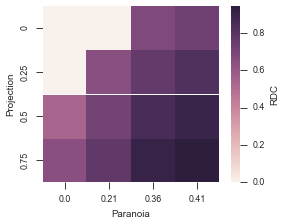

(0.78374999999999995, 0.099999999999999978, 0.11624999999999996, 0.80000000000000004)
(0.125, 0.099999999999999978, 0.62, 0.80000000000000004)


In [21]:
fig, ax = plt.subplots(1,1,figsize=(linewidthin, linewidthin*3./4))
tf = df[df['Time'] == df['Time'].max()]
g = pivot_table_heatmap(tf, index='Projection', columns='Paranoia', values='Rate of Defections',
                         linewidths=.001, cbar_kws={'label': 'RDC'}, square=True)
#fig.tight_layout()
cax = plt.gcf().axes[-1]
ax = plt.gcf().axes[0]
ax.set_yticklabels([0.75, 0.5, 0.25, 0])
print(cax.get_position().bounds)
print(ax.get_position().bounds)
cbpos = cax.get_position().bounds
cbpos = list(cbpos)
#cbpos[3] = 0.58
cbpos[1] += 0.07 #= 0.22
cax.set_position(cbpos)

axpos = list(ax.get_position().bounds)
axpos[1] += 0.07
ax.set_position(axpos)
plt.savefig('figures/avoiding_heatmap.pdf')

In [18]:
tf.pivot_table(index='Proyection', columns='Paranoia', values='seed', aggfunc=len)

Paranoia    0.000000  0.214284  0.356952  0.407111
Proyection                                        
0.00             100       100       100       100
0.25             100       100       100       100
0.50             100       100       100       100
0.75             100       100       100       100